In [1]:
import torch
print(torch.cuda.is_available())

True


In [8]:
import pandas as pd

scp_statements_path = r".\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\scp_statements.csv"
scp_statements = pd.read_csv(scp_statements_path)

sinus_descriptions = ['sinus rhythm', 'normal functioning artificial pacemaker', 'normal ECG']
afib_descriptions = ['atrial fibrillation', 'atrial flutter']
heart_block_descriptions = [
    'first degree AV block', 'second degree AV block', 
    'left bundle branch block', 'right bundle branch block', 'incomplete left bundle branch block', 
    'incomplete right bundle branch block', 'left anterior fascicular block', 'right posterior fascicular block'
]

filtered_by_sinus = scp_statements[scp_statements['description'].str.contains('|'.join(sinus_descriptions), case=False, na=False)]
filtered_by_sinus['group'] = 'Sinus'

filtered_by_afib = scp_statements[scp_statements['description'].str.contains('|'.join(afib_descriptions), case=False, na=False)]
filtered_by_afib['group'] = 'AFib'

filtered_by_heart_block = scp_statements[scp_statements['description'].str.contains('|'.join(heart_block_descriptions), case=False, na=False)]
filtered_by_heart_block['group'] = 'Heart Block'

combined_filtered_df = pd.concat([filtered_by_sinus, filtered_by_afib, filtered_by_heart_block]).drop_duplicates()

print("Combined filtered DataFrame with appropriate groups:")
print(combined_filtered_df[['diagnostic_class', 'description', 'group', 'scp_code']])


Combined filtered DataFrame with appropriate groups:
   diagnostic_class                              description        group  \
4              NORM                               normal ECG        Sinus   
59              NaN                             sinus rhythm        Sinus   
64              NaN  normal functioning artificial pacemaker        Sinus   
60              NaN                      atrial fibrillation         AFib   
67              NaN                           atrial flutter         AFib   
8                CD           left anterior fascicular block  Heart Block   
10               CD     incomplete right bundle branch block  Heart Block   
11               CD                    first degree AV block  Heart Block   
14               CD       complete right bundle branch block  Heart Block   
15               CD        complete left bundle branch block  Heart Block   
33               CD      incomplete left bundle branch block  Heart Block   
43               CD    

C:\Users\Vinh\AppData\Local\Temp\ipykernel_48496\844216312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_sinus['group'] = 'Sinus'
C:\Users\Vinh\AppData\Local\Temp\ipykernel_48496\844216312.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_afib['group'] = 'AFib'
C:\Users\Vinh\AppData\Local\Temp\ipykernel_48496\844216312.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [9]:
import pandas as pd

valid_scp_codes = combined_filtered_df['scp_code'].dropna().unique()
valid_scp_codes

array(['NORM', 'SR', 'PACE', 'AFIB', 'AFLT', 'LAFB', 'IRBBB', '1AVB',
       'CRBBB', 'CLBBB', 'ILBBB', '2AVB'], dtype=object)

In [10]:
import ast

ptbxl_df = pd.read_csv('.\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptbxl_database.csv')

def get_highest_scp_code(scp_dict):
    scp_dict = ast.literal_eval(scp_dict)
    return max(scp_dict, key=scp_dict.get)

ptbxl_df['highest_scp_code'] = ptbxl_df['scp_codes'].apply(get_highest_scp_code)
ptbxl_df.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code
0,1,15709,56,1,NaN,63.0,2.0,0.0,CS-12 E,11/9/1984 9:17,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,NORM
1,2,13243,19,0,NaN,70.0,2.0,0.0,CS-12 E,11/14/1984 12:55,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,NORM
2,3,20372,37,1,NaN,69.0,2.0,0.0,CS-12 E,11/15/1984 12:49,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,NORM
3,4,17014,24,0,NaN,82.0,2.0,0.0,CS-12 E,11/15/1984 13:44,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,NORM
4,5,17448,19,1,NaN,70.0,2.0,0.0,CS-12 E,11/17/1984 10:43,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,NORM


In [11]:
filtered_ptbxl_df = ptbxl_df[ptbxl_df['highest_scp_code'].isin(valid_scp_codes)]
filtered_ptbxl_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code
0,1,15709,56,1,NaN,63.0,2.0,0.0,CS-12 E,11/9/1984 9:17,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,NORM
1,2,13243,19,0,NaN,70.0,2.0,0.0,CS-12 E,11/14/1984 12:55,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,NORM
2,3,20372,37,1,NaN,69.0,2.0,0.0,CS-12 E,11/15/1984 12:49,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,NORM
3,4,17014,24,0,NaN,82.0,2.0,0.0,CS-12 E,11/15/1984 13:44,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,NORM
4,5,17448,19,1,NaN,70.0,2.0,0.0,CS-12 E,11/17/1984 10:43,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,NORM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21792,21831,11905,55,1,NaN,NaN,1.0,2.0,AT-60 3,5/28/2001 12:49,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/21000/21831_lr,records500/21000/21831_hr,NORM
21793,21832,7954,63,0,NaN,NaN,1.0,2.0,AT-60 3,5/30/2001 14:14,...,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr,LAFB
21795,21834,20703,300,0,NaN,NaN,1.0,2.0,AT-60 3,6/5/2001 11:33,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,NORM
21797,21836,8873,64,1,NaN,NaN,1.0,2.0,AT-60 3,6/9/2001 18:21,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,NORM


In [6]:
import os
import wfdb
import re

mit_bih_dir = "C:\Vinh\CSSALT\CSSALT-waveform-classify-model\mit-bih-malignant-ventricular-ectopy-database-1.0.0\mit-bih-malignant-ventricular-ectopy-database-1.0.0"

records = sorted(set(f.split('.')[0] for f in os.listdir(mit_bih_dir) if f.endswith('.atr')))

data = []
for record in records:
    record_path = os.path.join(record) 

    annotation = wfdb.rdann(os.path.join(mit_bih_dir, record), 'atr')
    label = annotation.aux_note[0] if annotation.aux_note else "UNKNOWN"  # Get the first label or use default
    
    label = re.sub(r'[()]', '', label)
    
    data.append({'Record': record_path, 'Label': label})

df = pd.DataFrame(data)
df

,Record,Label
0,418,N 
1,419,N 
2,420,N 
3,421,N 
4,422,N 
5,423,N 
6,424,N 
7,425,N 
8,426,N 
9,427,N 


In [26]:
from jupyter_server import serverapp
serverapp.ServerApp.iopub_data_rate_limit = 10000000  

In [30]:
import wfdb

record_path = 'C:\Vinh\CSSALT\CSSALT-waveform-classify-model\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/06000/06842_lr'  # Adjust path as necessary

try:
    record = wfdb.rdrecord(record_path)
    print(record.p_signal)  
    print(record.__dict__)  
except Exception as e:
    print(f"Error loading record: {e}")


[[ 0.018 -0.001 -0.019 ...  0.03  -0.015  0.   ]
 [ 0.014 -0.006 -0.02  ...  0.03  -0.016 -0.003]
 [ 0.022  0.002 -0.02  ...  0.027 -0.02  -0.009]
 ...
 [-0.035  0.038  0.073 ...  0.066 -0.013 -0.071]
 [-0.044  0.024  0.067 ...  0.082 -0.066 -0.082]
 [-0.058  0.016  0.074 ...  0.097 -0.246 -0.031]]
{'record_name': '06842_lr', 'n_sig': 12, 'fs': 100, 'counter_freq': None, 'base_counter': None, 'sig_len': 1000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[ 0.018, -0.001, -0.019, ...,  0.03 , -0.015,  0.   ],
       [ 0.014, -0.006, -0.02 , ...,  0.03 , -0.016, -0.003],
       [ 0.022,  0.002, -0.02 , ...,  0.027, -0.02 , -0.009],
       ...,
       [-0.035,  0.038,  0.073, ...,  0.066, -0.013, -0.071],
       [-0.044,  0.024,  0.067, ...,  0.082, -0.066, -0.082],
       [-0.058,  0.016,  0.074, ...,  0.097, -0.246, -0.031]]), 'd_signal': None, 'e_p_signal': None, 'e_d_sig

In [12]:
group_mapping = {
    'AFIB': 'AFib-related',
    'AFLT': 'AFib-related',
    '1AVB': 'Block-related',
    '2AVB': 'Block-related',
    #'3AVB': 'Block-related',
    'CLBBB': 'Block-related',
    'CRBBB': 'Block-related',
    'ILBBB': 'Block-related',
    'IRBBB': 'Block-related',
    'LAFB': 'Block-related',
    'NORM': 'Normal',
    'PACE': 'Normal',
    'SR': 'Normal'
}

filtered_ptbxl_df['Group'] = filtered_ptbxl_df['highest_scp_code'].map(group_mapping)

filtered_ptbxl_df[['highest_scp_code', 'Group']]


C:\Users\Vinh\AppData\Local\Temp\ipykernel_48496\3386356397.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ptbxl_df['Group'] = filtered_ptbxl_df['highest_scp_code'].map(group_mapping)


,highest_scp_code,Group
0,NORM,Normal
1,NORM,Normal
2,NORM,Normal
3,NORM,Normal
4,NORM,Normal
...,...,...
21792,NORM,Normal
21793,LAFB,Block-related
21795,NORM,Normal
21797,NORM,Normal


In [13]:
group_counts = filtered_ptbxl_df['Group'].value_counts()
group_counts

Group
Normal           9427
Block-related    2880
AFib-related      100
Name: count, dtype: int64

In [14]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd

augmentation_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  
    transforms.RandomResizedCrop((100, 250), scale=(0.95, 1.05)),
    transforms.RandomInvert(p=0.5),
    transforms.ToTensor(),  
])

afib_related_df = filtered_ptbxl_df[filtered_ptbxl_df['Group'] == 'AFib-related']

augmented_images = []
augmented_labels = []

root_path = r"C:\Vinh\CSSALT\CSSALT-waveform-classify-model\ecg_images"

def resize_image(img, size=(100, 250)):
    return img.resize(size)

for idx, row in afib_related_df.iterrows():
    ecg_id_padded = str(row['ecg_id']).zfill(5) + "_lr"
    image_path = os.path.join(root_path, f"{ecg_id_padded}.png")
    label = row['Group']

    if os.path.exists(image_path):
        img = Image.open(image_path).convert("RGB")
    else:
        print(f"Warning: Image file not found at {image_path}")
        continue  

    img_resized = resize_image(img)

    for _ in range(20):  
        augmented_img = augmentation_transforms(img_resized)
        augmented_images.append(augmented_img)
        augmented_labels.append(label)

augmented_dataset = list(zip(augmented_images, augmented_labels))

In [15]:
import torchvision.transforms as T
from sklearn.utils import resample 

resize_transform = T.Resize((100, 250)) 

def load_image_as_tensor(image_path):
    if os.path.exists(image_path):
        img = Image.open(image_path).convert("RGB")
        img_resized = resize_transform(img)  
        return T.ToTensor()(img_resized)
    else:
        print(f"Warning: Image file not found at {image_path}")
        return None

normal_df = filtered_ptbxl_df[filtered_ptbxl_df['Group'] == 'Normal']
block_related_df = filtered_ptbxl_df[filtered_ptbxl_df['Group'] == 'Block-related']

normal_downsampled = resample(normal_df, replace=False, n_samples=2000, random_state=42)
block_downsampled = resample(block_related_df, replace=False, n_samples=2000, random_state=42)

normal_images = []
normal_labels = []
block_images = []
block_labels = []

for idx, row in normal_downsampled.iterrows():
    ecg_id_padded = str(row['ecg_id']).zfill(5) + "_lr"
    image_path = os.path.join(root_path, f"{ecg_id_padded}.png")
    label = row['Group']

    tensor_image = load_image_as_tensor(image_path)
    if tensor_image is not None:
        normal_images.append(tensor_image)
        normal_labels.append(label)

for idx, row in block_downsampled.iterrows():
    ecg_id_padded = str(row['ecg_id']).zfill(5) + "_lr"
    image_path = os.path.join(root_path, f"{ecg_id_padded}.png")
    label = row['Group']

    tensor_image = load_image_as_tensor(image_path)
    if tensor_image is not None:
        block_images.append(tensor_image)
        block_labels.append(label)
normal_downsampled['image'] = normal_images
block_downsampled['image'] = block_images

In [16]:
augmented_df = pd.DataFrame({
    'image': augmented_images,  
    'Group': augmented_labels   
})

balanced_df = pd.concat([normal_downsampled, block_downsampled, augmented_df])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code,Group,image
0,8033.0,1520.0,74.0,1.0,160.0,85.0,11.0,1.0,AT-6 C 5.5,4/28/1992 12:35,...,NaN,NaN,NaN,NaN,5.0,records100/08000/08033_lr,records500/08000/08033_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
1,14395.0,1982.0,87.0,0.0,NaN,NaN,10.0,1.0,AT-6 C 5.5,7/7/1995 8:36,...,NaN,NaN,NaN,NaN,6.0,records100/14000/14395_lr,records500/14000/14395_hr,IRBBB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
2,15045.0,9207.0,75.0,0.0,NaN,NaN,0.0,0.0,CS100 3,9/22/1995 13:11,...,NaN,NaN,NaN,"ja, pacemaker",8.0,records100/15000/15045_lr,records500/15000/15045_hr,PACE,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
3,18864.0,9768.0,60.0,0.0,NaN,NaN,1.0,2.0,CS-12,11/15/1997 20:28,...,NaN,NaN,1ES,NaN,6.0,records100/18000/18864_lr,records500/18000/18864_hr,CRBBB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1187.0,5436.0,69.0,0.0,178.0,83.0,9.0,1.0,AT-6 C 5.5,9/17/1987 15:34,...,NaN,NaN,NaN,NaN,6.0,records100/01000/01187_lr,records500/01000/01187_hr,1AVB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(..."
5997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
5998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFib-related,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(..."


In [17]:
group_sizes = balanced_df.groupby('Group').size()
group_sizes

Group
AFib-related     2000
Block-related    2000
Normal           2000
dtype: int64

In [18]:
group_to_label = {
    "Normal": 0,
    "AFib-related": 1,
    "Block-related": 2
}

balanced_df["label"] = balanced_df["Group"].map(group_to_label)

In [19]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(
    balanced_df,
    test_size=0.15,  # 15% for testing
    stratify=balanced_df['label'],
    random_state=42
)

train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.15 / (1 - 0.15),  # remaining 85%
    stratify=train_val_df['label'],
    random_state=42
)

print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")

print("\nTraining set distribution:")
print(train_df['Group'].value_counts())

print("\nValidation set distribution:")
print(val_df['Group'].value_counts())

print("\nTesting set distribution:")
print(test_df['Group'].value_counts())

Training set: 4199 samples
Validation set: 901 samples
Testing set: 900 samples

Training set distribution:
Group
Normal           1400
AFib-related     1400
Block-related    1399
Name: count, dtype: int64

Validation set distribution:
Group
Block-related    301
Normal           300
AFib-related     300
Name: count, dtype: int64

Testing set distribution:
Group
AFib-related     300
Block-related    300
Normal           300
Name: count, dtype: int64


In [18]:
train_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,highest_scp_code,Group,image,label
2442,5902.0,13529.0,75.0,1.0,NaN,NaN,NaN,3.0,AT-6 C,3/12/1991 16:44,...,NaN,NaN,NaN,4.0,records100/05000/05902_lr,records500/05000/05902_hr,LAFB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",2
3329,2897.0,20805.0,69.0,1.0,158.0,66.0,1.0,2.0,CS-12,6/1/1989 13:57,...,NaN,NaN,NaN,6.0,records100/02000/02897_lr,records500/02000/02897_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
1716,5853.0,5224.0,40.0,1.0,152.0,58.0,11.0,1.0,AT-6 C 5.5,2/28/1991 13:14,...,NaN,NaN,NaN,5.0,records100/05000/05853_lr,records500/05000/05853_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
2135,15608.0,13594.0,55.0,0.0,NaN,NaN,0.0,0.0,CS100 3,1/16/1996 13:40,...,NaN,NaN,NaN,2.0,records100/15000/15608_lr,records500/15000/15608_hr,LAFB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",2
379,15798.0,11257.0,89.0,0.0,NaN,NaN,1.0,2.0,AT-60 3,3/2/1996 15:28,...,NaN,NaN,NaN,10.0,records100/15000/15798_lr,records500/15000/15798_hr,CLBBB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,13147.0,20548.0,27.0,1.0,NaN,59.0,2.0,0.0,CS-12 E,10/8/1994 10:54,...,NaN,NaN,NaN,6.0,records100/13000/13147_lr,records500/13000/13147_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
5458,19559.0,15827.0,61.0,0.0,NaN,NaN,0.0,0.0,CS100 3,8/28/1998 11:38,...,NaN,"1,V1",NaN,5.0,records100/19000/19559_lr,records500/19000/19559_hr,LAFB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",2
3634,11528.0,16638.0,69.0,0.0,NaN,NaN,1.0,2.0,CS-12,12/15/1993 14:13,...,NaN,NaN,NaN,1.0,records100/11000/11528_lr,records500/11000/11528_hr,NORM,Normal,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",0
3880,9985.0,6877.0,57.0,1.0,165.0,78.0,8.0,1.0,AT-6 C 5.5,4/8/1993 13:12,...,NaN,NaN,NaN,3.0,records100/09000/09985_lr,records500/09000/09985_hr,LAFB,Block-related,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",2


In [20]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class ECGDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = row['image']
        
        label = row['label'] 

        if self.transform:
            image = self.transform(image)
    
        return image, label

class ResizeFixedSize:
    def __init__(self, size):
        self.size = size

    def __call__(self, img):
        return torch.nn.functional.interpolate(img.unsqueeze(0), size=self.size).squeeze(0)

train_transform = transforms.Compose([
    ResizeFixedSize((100, 250)),  
    transforms.RandomResizedCrop((100, 250), scale=(0.95, 1.05)), 
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2)], p=0.5),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=(2, 2))], p=0.3),
    transforms.RandomInvert(p=0.5),
    #transforms.RandomErasing(p=0.3, scale=(0.02, 0.1)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    ResizeFixedSize((100, 250)),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ECGDataset(train_df, transform=train_transform)
val_dataset = ECGDataset(val_df, transform=val_test_transform)
test_dataset = ECGDataset(test_df, transform=val_test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


In [21]:
train_size = len(train_dataset) 
val_size = len(val_dataset)     
test_size = len(test_dataset) 

train_batches = len(train_loader)
val_batches = len(val_loader)     
test_batches = len(test_loader)   

print(f"Training set size: {train_size} samples, {train_batches} batches")
print(f"Validation set size: {val_size} samples, {val_batches} batches")
print(f"Test set size: {test_size} samples, {test_batches} batches")

Training set size: 4199 samples, 132 batches
Validation set size: 901 samples, 29 batches
Test set size: 900 samples, 29 batches


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2565577].


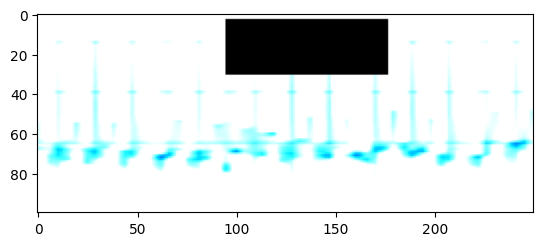

In [22]:
import matplotlib.pyplot as plt

for images, _ in train_loader:
    img = images[0].permute(1, 2, 0).numpy()  
    plt.imshow(img)
    plt.show()
    break

In [23]:
import torch
import torch.nn as nn
from torchvision import models

class ResNet50TransferLearning(nn.Module):
    def __init__(self, num_classes=3):
        super(ResNet50TransferLearning, self).__init__()

        self.resnet50 = models.resnet50(pretrained=True)

        for name, param in self.resnet50.named_parameters():
            param.requires_grad = False
            if "layer4" in name or "fc" in name:
                param.requires_grad = True
        self.resnet50.fc = nn.Sequential(
            nn.Dropout(0.5),  
            nn.Linear(self.resnet50.fc.in_features, num_classes)
        )
        
    def forward(self, x):
        return self.resnet50(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNet50TransferLearning(num_classes=3).to(device)

from torchsummary import summary
summary(model, input_size=(3, 100, 250))


C:\Vinh\Python\Machine Learning\cuda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Vinh\Python\Machine Learning\cuda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 64, 50, 125]           9,408
       BatchNorm2d-2          [-1, 64, 50, 125]             128
              ReLU-3          [-1, 64, 50, 125]               0
         MaxPool2d-4           [-1, 64, 25, 63]               0
            Conv2d-5           [-1, 64, 25, 63]           4,096
       BatchNorm2d-6           [-1, 64, 25, 63]             128
              ReLU-7           [-1, 64, 25, 63]               0
            Conv2d-8           [-1, 64, 25, 63]          36,864
       BatchNorm2d-9           [-1, 64, 25, 63]             128
             ReLU-10           [-1, 64, 25, 63]               0
           Conv2d-11          [-1, 256, 25, 63]          16,384
      BatchNorm2d-12          [-1, 256, 25, 63]             512
           Conv2d-13          [-1, 256, 25, 63]          16,384
      BatchNorm2d-14          [-1, 256,

In [24]:
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

num_epochs = 20  

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    model.eval()  
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad(): 
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    scheduler.step(val_loss)

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

model.eval()  
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader)
test_accuracy = 100 * test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/20], Loss: 0.4866, Accuracy: 73.45%
Validation Loss: 0.4671, Validation Accuracy: 74.69%
Epoch [2/20], Loss: 0.3979, Accuracy: 79.38%
Validation Loss: 0.4000, Validation Accuracy: 78.47%
Epoch [3/20], Loss: 0.3787, Accuracy: 80.02%
Validation Loss: 0.3969, Validation Accuracy: 78.47%
Epoch [4/20], Loss: 0.3630, Accuracy: 81.54%
Validation Loss: 0.4189, Validation Accuracy: 76.69%
Epoch [5/20], Loss: 0.3474, Accuracy: 82.38%
Validation Loss: 0.4067, Validation Accuracy: 77.91%
Epoch [6/20], Loss: 0.3451, Accuracy: 83.02%
Validation Loss: 0.4170, Validation Accuracy: 76.80%
Epoch [7/20], Loss: 0.3412, Accuracy: 83.23%
Validation Loss: 0.4229, Validation Accuracy: 74.58%
Epoch [8/20], Loss: 0.3026, Accuracy: 85.52%
Validation Loss: 0.4089, Validation Accuracy: 78.02%
Epoch [9/20], Loss: 0.2920, Accuracy: 86.35%
Validation Loss: 0.4198, Validation Accuracy: 76.47%
Epoch [10/20], Loss: 0.2880, Accuracy: 86.52%
Validation Loss: 0.4192, Validation Accuracy: 77.47%
Epoch [11/20], Loss

In [25]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, dataloader, device, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    report = classification_report(y_true, y_pred, target_names=class_names)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    return report, cm


Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.95      0.70       300
        AFib       1.00      0.99      1.00       300
       Block       0.82      0.25      0.38       301

    accuracy                           0.73       901
   macro avg       0.79      0.73      0.69       901
weighted avg       0.79      0.73      0.69       901



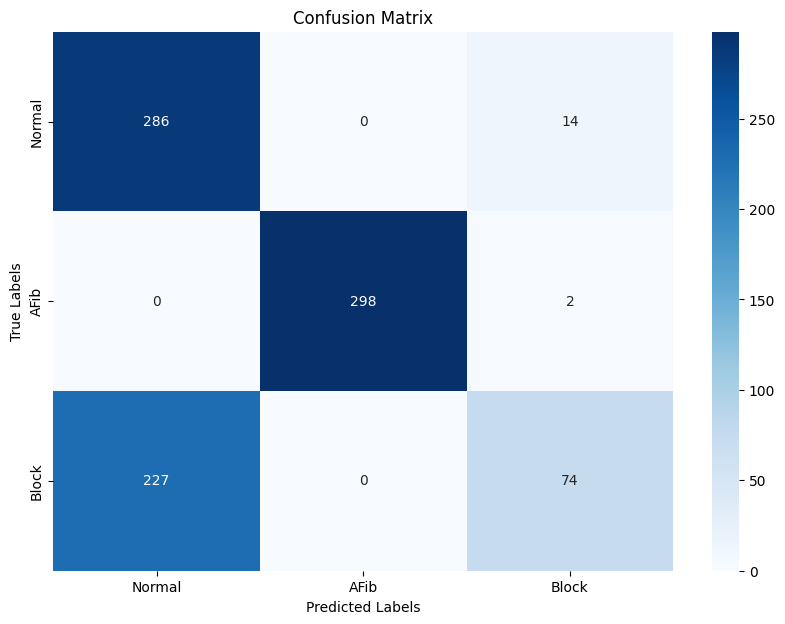

              precision    recall  f1-score   support

      Normal       0.56      0.95      0.70       300
        AFib       1.00      0.99      1.00       300
       Block       0.82      0.25      0.38       301

    accuracy                           0.73       901
   macro avg       0.79      0.73      0.69       901
weighted avg       0.79      0.73      0.69       901



array([[286,   0,  14],
       [  0, 298,   2],
       [227,   0,  74]], dtype=int64)

In [26]:
class_names = ["Normal", "AFib", "Block"]

report, cm = evaluate_model(model, val_loader, device, class_names)
print(report)
cm